In [2]:
import numpy as np
import torch
from michigrad.michigrad.visualize import show_graph
from michigrad.michigrad.engine import Value
from michigrad.michigrad.nn import Module, Neuron, Layer, MLP

In [3]:

w0 = Value(-.5,name ='w0')
x0 = Value(.5,name ='x0')
w1 = Value(-.3,name ='w1')
x1 = Value(2,name ='x1')
w0x0    = w0 * x0; w0x0.name ='w0x0'
w1x1    = w1 * x1; w1x1.name ='w1x1'
yhat = w0x0 + w1x1; yhat.name ='yhat'

y= Value(.8,name ='y')
L = y-yhat; L.name ='L'
L.backward()
w0.grad

-0.5

In [9]:
w0 = torch.tensor(-.5); w0.requires_grad = True
x0 = torch.tensor(.5); x0.requires_grad = True
w1 = torch.tensor(-.3); w1.requires_grad = True
x1 = torch.tensor(2.); x1.requires_grad = True
yhat = w0 * x0 + w1 * x1
y = torch.tensor(.8); y.requires_grad = True
L = y - yhat
L.backward()
w0

tensor(-0.5000, requires_grad=True)

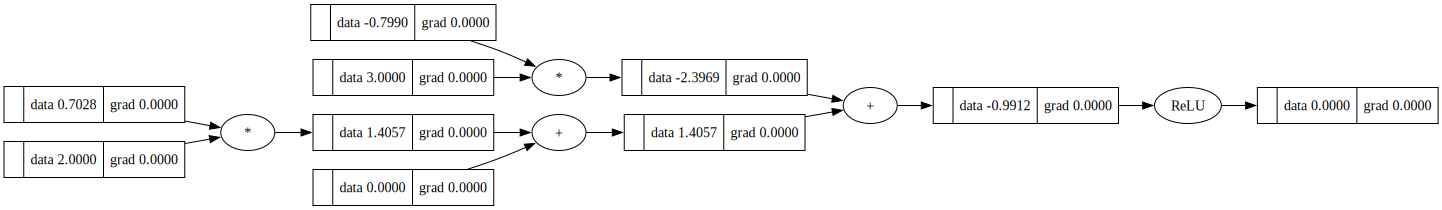

In [10]:
x = [2,3]
n = Neuron(2)
n(x) #forward pass de la neurona
show_graph(n(x)) #visualizar el grafo computacional

In [ ]:

xor = MLP(2, [3,3,1]) # 2 entradas, una capa oculta con 3 salidas, 
xs = [[0,0],[0,1],[1,0],[1,1]]
ys = [0,1,1,0]

xor.parameters()


[Value(data=0.06572788657829709, grad=0, name=),
 Value(data=0.10257010889412776, grad=0, name=),
 Value(data=0, grad=0, name=),
 Value(data=0.7096260080772776, grad=0, name=),
 Value(data=0.2902981583856965, grad=0, name=),
 Value(data=0, grad=0, name=),
 Value(data=-0.5643572801304302, grad=0, name=),
 Value(data=-0.7704926216844616, grad=0, name=),
 Value(data=0, grad=0, name=),
 Value(data=0.09758094403117212, grad=0, name=),
 Value(data=0.3619873019399793, grad=0, name=),
 Value(data=0.26118104202059644, grad=0, name=),
 Value(data=0, grad=0, name=),
 Value(data=-0.02251582759308457, grad=0, name=),
 Value(data=0.6801987402563165, grad=0, name=),
 Value(data=-0.345363716348394, grad=0, name=),
 Value(data=0, grad=0, name=),
 Value(data=-0.8588378468147462, grad=0, name=),
 Value(data=0.06701004321253068, grad=0, name=),
 Value(data=-0.11438694377073255, grad=0, name=),
 Value(data=0, grad=0, name=),
 Value(data=0.37154376634572683, grad=0, name=),
 Value(data=-0.0714287046204698, 

In [50]:
yhats = [xor(x) for x in xs]
yhats

[Value(data=0.0, grad=0, name=),
 Value(data=0.02882275444636384, grad=0, name=),
 Value(data=0.06345155450902831, grad=0, name=),
 Value(data=0.09227430895539215, grad=0, name=)]

Forma manual de entrenamiento

In [ ]:
#lossM = [(y-yhat)**2 for y, yhat, in zip(ys,yhats)] 
#Aca la funcion de perdida es de cada salida, deberia ser un solo numero, por lo que
loss = sum([(y-yhat)**2 for y, yhat, in zip(ys,yhats)])/len(yhats)
loss.backward() #hace el backpropagation incluidos los nodos de los pesos.
loss
#Hay que poner los gradientes en cero
for p in xor.parameters():
    p.grad =0


Value(data=0.45720569528147464, grad=1, name=)

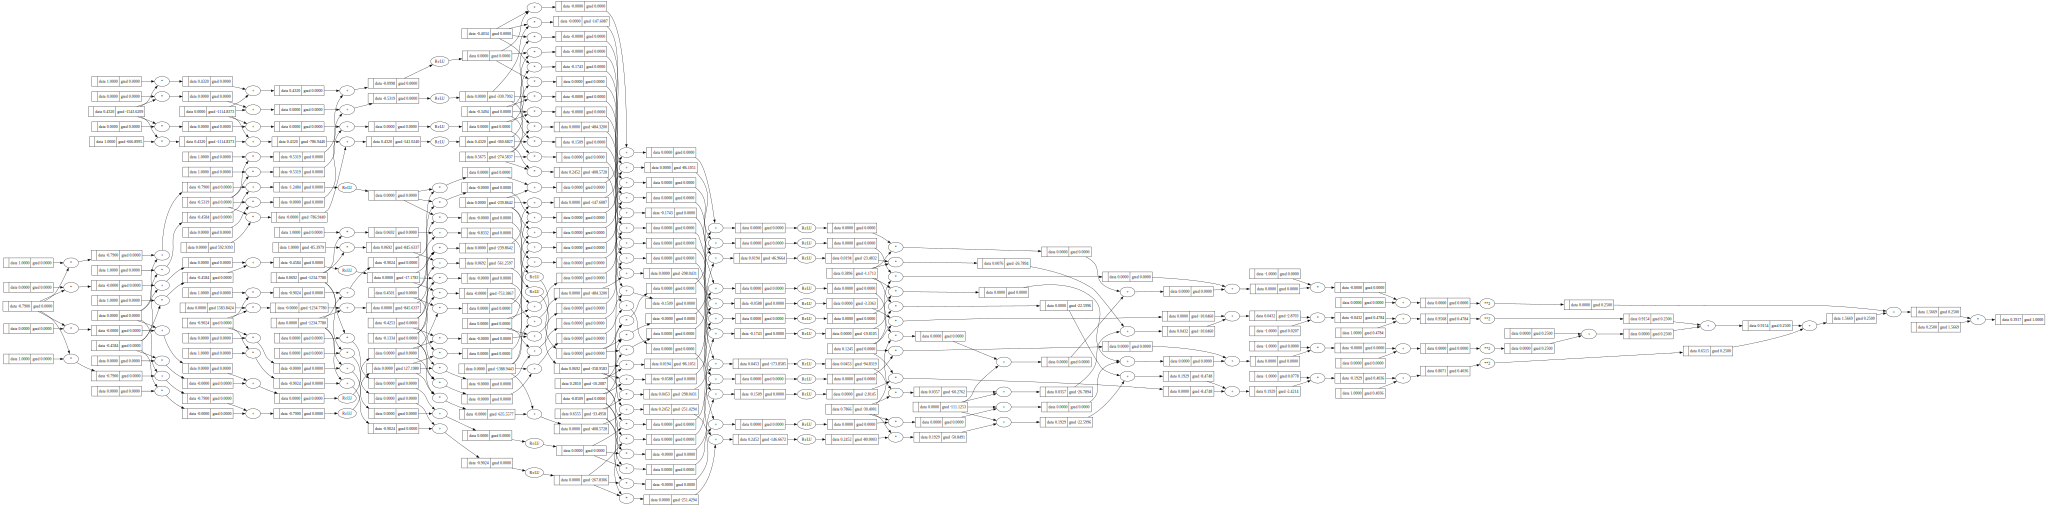

In [30]:
#muestra del grafo del Loss. 
# Muestra lo nodos y los calculos que se hacen para hacerlo
show_graph(loss)

In [52]:
#parametros del modelo
xor.parameters()


[Value(data=0.06572788657829709, grad=-0.015983742174800038, name=),
 Value(data=0.10257010889412776, grad=-0.01663933232978876, name=),
 Value(data=0, grad=-0.03437000562550757, name=),
 Value(data=0.7096260080772776, grad=-0.03626512460336796, name=),
 Value(data=0.2902981583856965, grad=-0.037752577191091194, name=),
 Value(data=0, grad=-0.07798127140668065, name=),
 Value(data=-0.5643572801304302, grad=0.0, name=),
 Value(data=-0.7704926216844616, grad=0.0, name=),
 Value(data=0, grad=0.0, name=),
 Value(data=0.09758094403117212, grad=-0.02705610029337844, name=),
 Value(data=0.3619873019399793, grad=-0.15869800706060405, name=),
 Value(data=0.26118104202059644, grad=0.0, name=),
 Value(data=0, grad=-0.3372598220594912, name=),
 Value(data=-0.02251582759308457, grad=0.005201492720615959, name=),
 Value(data=0.6801987402563165, grad=0.030509442216401457, name=),
 Value(data=-0.345363716348394, grad=0.0, name=),
 Value(data=0, grad=0.06483767026203713, name=),
 Value(data=-0.85883784

In [ ]:
#paso de optimización
learning_rate = 0.1
for p in xor.parameters():
    p.data -= p.grad *learning_rate

In [54]:
#forwarpass
yhats = [xor(x) for x in xs]
loss = sum([(y-yhat)**2 for y, yhat, in zip(ys,yhats)])/len(yhats)
loss

Value(data=0.3625542259287227, grad=0, name=)

Esto se llama stochastic gradient descent SGD

Bucle de entrenamiento:

In [10]:

xor = MLP(2, [3,3,1]) # 2 entradas, una capa oculta con 3 salidas, 
xs = [[0,0],[0,1],[1,0],[1,1]]
ys = [0,1,1,0]
steps = 1000
lr = 0.01 #learning rate


In [ ]:
for _ in range(steps):
    #1.forward pass
    yhats = [xor(x) for x in xs]
    #2.calcular funcionde perdida
    loss = sum([(y - yhat)**2 for y, yhat, in zip(ys,yhats)])/4
    #3.poner grandientes en cero
    for p in xor.parameters():
        p.grad = 0
    #4.Correr backward sobre la funcion de perdida
    loss.backward()
    #5. update de los pesos
    for p in xor.parameters():
        p.data -= p.grad * lr
loss

Value(data=4.180690198723896e-12, grad=1, name=)

In [18]:
xor([0,0]),xor([0,1]),xor([1,0]),xor([1,1])

(Value(data=3.782093635454342e-06, grad=0, name=),
 Value(data=0.9999991581765747, grad=0, name=),
 Value(data=0.9999988880706338, grad=0, name=),
 Value(data=-5.137150412143354e-07, grad=0, name=))